## Finite Difference Method for Boundary Value Problem
The function below solves
$$\frac{d^2y}{dx^2} + p\frac{dy}{dx} + qy = f(x)$$
by using the finite difference method to approximate
$$\frac{d^2y}{dx^2}(x_i) \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}$$
$$\frac{dy}{dx}(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BVP_FDM(f, p, q, a, b, y_a, y_b, h):
    N = (b-a)/h
    dim = int(N-1)
    A = np.zeros((dim,dim))
    
    # set up matrix system Ay = b
    A[0,0] = (-2/(h**2) + q)
    A[0,1] = (1/(h**2) + p/(2*h))
    A[dim-1,dim-2] = (1/(h**2) - p/(2*h))
    A[dim-1,dim-1] = (-2/(h**2) + q)
    for i in range(1,dim-1):
        A[i,i-1] = (1/(h**2) - p/(2*h))
        A[i,i] = (-2/(h**2) + q)
        A[i,i+1] = (1/(h**2) + p/(2*h))
    
    b = np.array([f(x) for x in np.arange(a+h,b,h)])
    b[0] = b[0] - y_a/(h**2) + p*y_a/(2*h)
    b[-1] = b[-1] - y_b/(h**2) - p*y_b/(2*h)
    
    # solve the tridiagonal system for y
    y = np.zeros(dim+2)
    y[0] = y_a
    y[-1] = y_b
    y[1:-1] = np.linalg.solve(A,b)
    
    return y

In [3]:
def f(x):
    return x*np.exp(x) - x

p=-2; q=1
h=0.2
y_a=0; y_b=-4
a=0; b=2

y = BVP_FDM(f, p, q, a, b, y_a, y_b, h)
y

array([ 0.        , -0.16033387, -0.39060396, -0.70664241, -1.12070439,
       -1.6367405 , -2.24304355, -2.90113894, -3.52936107, -3.97898362,
       -4.        ])

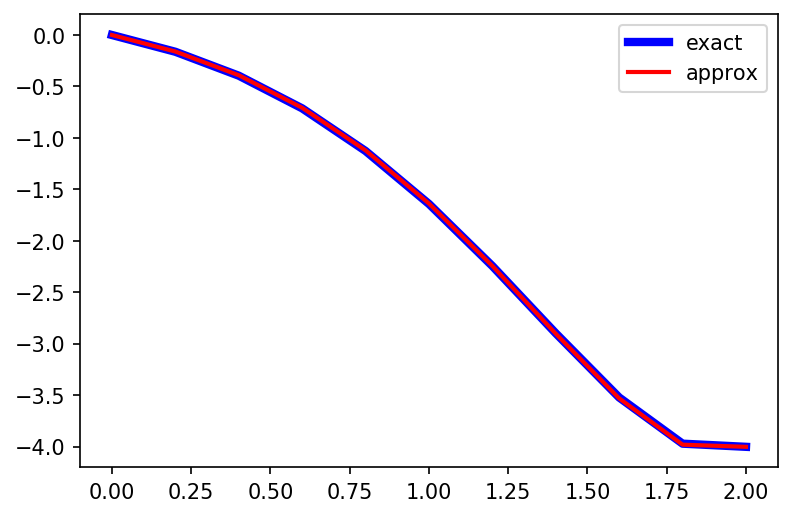

In [4]:
# compare to the exact solution
def y_exact(x):
    return (1/6)*(x**3)*np.exp(x) - (5/3)*x*np.exp(x) + 2*np.exp(x) - x - 2

X = np.arange(0,2.01,0.2)
y_true = [y_exact(x) for x in X]

plt.figure(dpi=150)
plt.plot(X,y_true, lw=4, c='b',label='exact')
plt.plot(X,y, lw=2, c='r',label='approx')
plt.legend()
plt.show()